# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

In [11]:
competition=pd.read_csv("competition.csv")
competition.head()

,Competition,Localscore,Roadscore,Plusminus,Ganador
0,Euroleague,94,73.0,21.0,Local
1,Euroleague,96,81.0,15.0,Local
2,Euroleague,79,82.0,-3.0,Visitante
3,Euroleague,80,68.0,12.0,Local
4,Euroleague,91,74.0,17.0,Local


Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [12]:
# 1 How many matches have been in each competition?

competition.groupby('Competition').agg('count')

,Localscore,Roadscore,Plusminus,Ganador
Competition,,,,
Eurocup,170,170,170,170
Euroleague,225,225,225,225


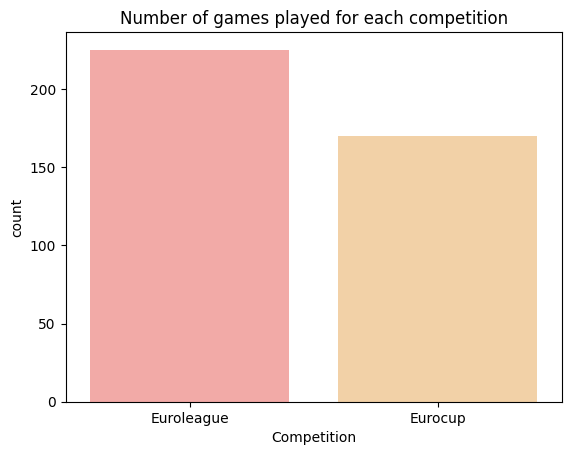

In [13]:
colors = {'Euroleague': "#ff9f9a", 'Eurocup': "#ffd29a" } 
sns.countplot(x=competition['Competition'], palette=colors)
plt.title("Number of games played for each competition")
plt.show()


In [14]:
# 2 What are the maximum points that a local team has scored per competition? And the road team as well. 
sub_competition = competition.groupby('Competition').agg({'Localscore':'max', 'Roadscore':'max'}).reset_index()
sub_competition

,Competition,Localscore,Roadscore
0,Eurocup,120,114.0
1,Euroleague,130,126.0


In [15]:
max_scores = pd.melt(sub_competition, ['Competition'])# acumula las variables en una sola para poder generar graficos de forma mas comoda
max_scores

,Competition,variable,value
0,Eurocup,Localscore,120.0
1,Euroleague,Localscore,130.0
2,Eurocup,Roadscore,114.0
3,Euroleague,Roadscore,126.0


In [16]:
max_scores_sorted = max_scores.sort_values(by=['Competition','value'], ascending=[False, False])
max_scores_sorted

,Competition,variable,value
1,Euroleague,Localscore,130.0
3,Euroleague,Roadscore,126.0
0,Eurocup,Localscore,120.0
2,Eurocup,Roadscore,114.0


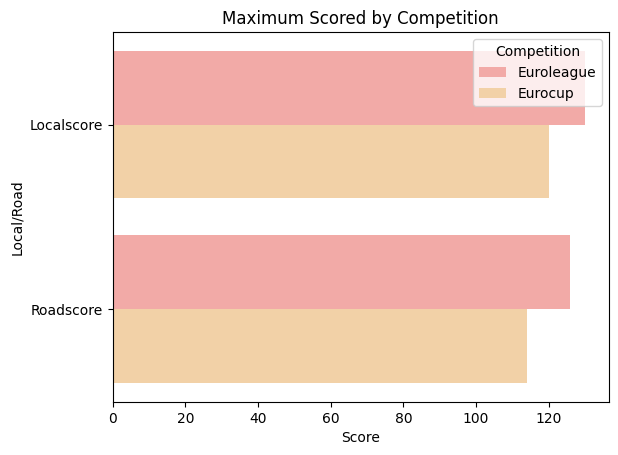

In [17]:
# With this graph we can compare the maximum points scored by a local or road team differenciating the Competintion League through the hue.
# It shows how the Euroleague scores are higher in voth variables Local and Road.


sns.barplot(x='value', y='variable', hue='Competition', data=max_scores_sorted, palette=colors)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Local/Road')
plt.title('Maximum Scored by Competition')

# Show the plot
plt.show()

In [49]:
competition=pd.read_csv("competition.csv")
sub_competition_1 = competition[['Competition', 'Localscore', 'Roadscore']]

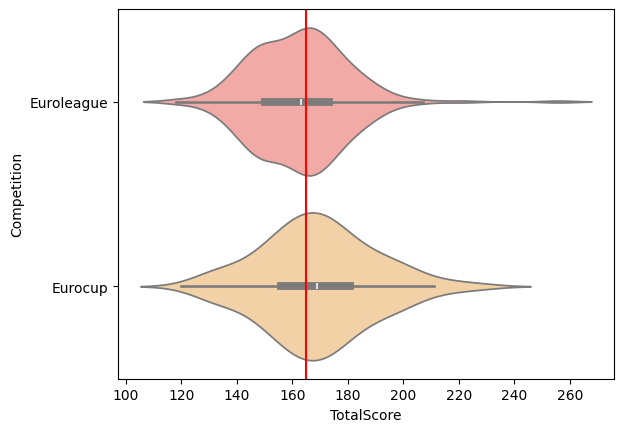

In [48]:
# 3 Do the same operations with the average points (per competition)
competition['TotalScore'] = competition['Localscore'] + competition['Roadscore']
competition_1 = competition[['Competition','Localscore', 'Roadscore', 'TotalScore', ]]
competition_violin = sns.violinplot(x=competition.TotalScore, y= competition.Competition, palette=colors)
competition_violin.axvline(x=competition.TotalScore.median(), c="red", label="median")

In [ ]:
competition['TotalScore'] = competition['Localscore'] + competition['Roadscore']

# Filter the data for Eurocup competition
competition_eurocup = competition[competition['Competition'] == 'Eurocup']
sub_competition_1 = competition_eurocup[['TotalScore',]]
sub_competition_1.reset_index(inplace=True)
sub_competition_1.drop(columns='index', inplace = True)

In [ ]:
# 4 Can you tell me the maximum difference that has been in a match, splitted by competition? 
competition['Absolut_Plusminus'] = np.where(competition['Plusminus']<0,competition['Plusminus'].abs(),competition['Plusminus'])
competition.sort_values(by = ['Absolut_Plusminus'], ascending=False )

,Competition,Localscore,Roadscore,Plusminus,Ganador,TotalScore,Absolut_Plusminus
35,Euroleague,98,59.0,39.0,Local,157.0,39.0
364,Eurocup,72,111.0,-39.0,Visitante,183.0,39.0
327,Eurocup,60,98.0,-38.0,Visitante,158.0,38.0
368,Eurocup,69,105.0,-36.0,Visitante,174.0,36.0
162,Euroleague,109,74.0,35.0,Local,183.0,35.0
...,...,...,...,...,...,...,...
147,Euroleague,76,77.0,-1.0,Visitante,153.0,1.0
149,Euroleague,85,84.0,1.0,Local,169.0,1.0
76,Euroleague,74,73.0,1.0,Local,147.0,1.0
361,Eurocup,92,93.0,-1.0,Visitante,185.0,1.0


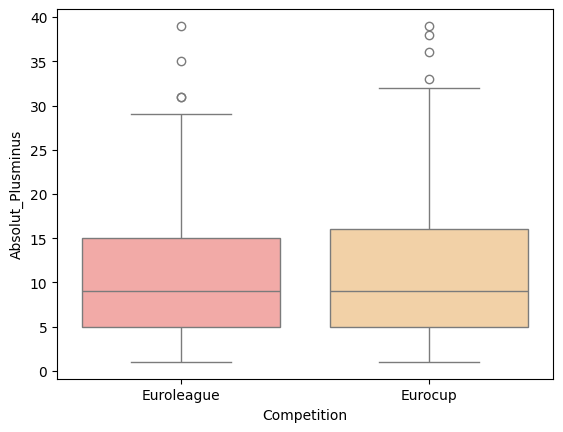

In [ ]:
sns.boxplot(x="Competition", y="Absolut_Plusminus", palette=colors, data=competition);

In [70]:
# 5 Also grouped by competition, give me the number of victories of the Locals and the Visitors
ganador = competition[['Competition','Ganador']]

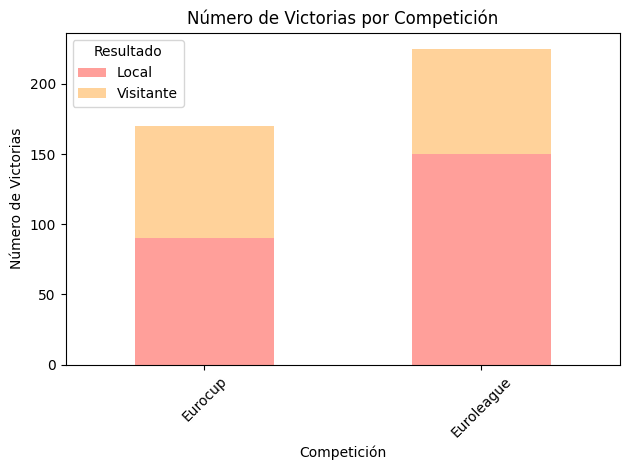

In [69]:
ganador_tabla = pd.crosstab(competition['Competition'], competition['Ganador'])

# Graficar las victorias de locales y visitantes por competición
fig, ax = plt.subplots()
ganador_tabla.plot(kind='bar', stacked=True, ax=ax, color=["#ff9f9a", "#ffd29a"])

plt.title('Número de Victorias por Competición')
plt.xlabel('Competición')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x

plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

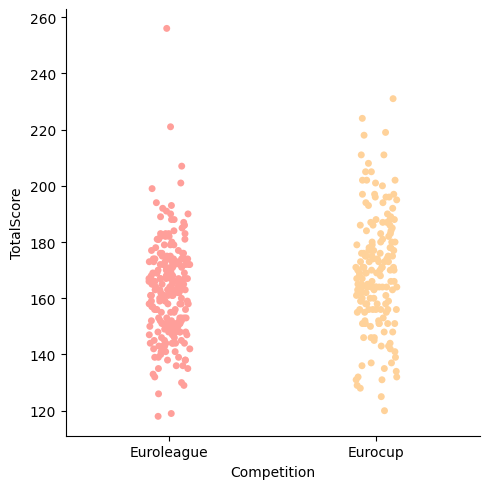

In [ ]:
# Comparison Chart
competition['TotalScore'] = competition['Localscore'] + competition['Roadscore']
competition_1 = competition[['Competition','Localscore', 'Roadscore', 'TotalScore', ]]
sns.catplot(data=competition_1, x="Competition", y="TotalScore", hue='Competition', palette=colors);

**Your comments here**
- Aqui podemos ver como de media, en la competición Eurocup se marcan más puntos por partido.
- A pesar de ello, vemos que en la Eurolegue se han llegado a marcadores mucho más altos (gran outlier)

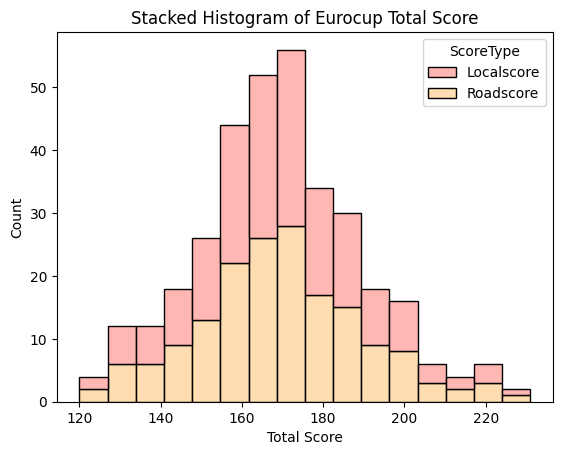

In [ ]:
# Stacked columns and histogram

competition['TotalScore'] = competition['Localscore'] + competition['Roadscore']
competition_eurocup = competition[competition['Competition'] == 'Eurocup']

# Create a new DataFrame with required columns
sub_competition_1 = competition_eurocup[['Competition', 'Localscore', 'Roadscore', 'TotalScore']]

# Melt the DataFrame to stack Localscore and Roadscore
melted_competition = pd.melt(sub_competition_1, id_vars=['Competition', 'TotalScore'], var_name='ScoreType', value_name='Score')

# Create the stacked histogram
sns.histplot(data=melted_competition, x='TotalScore', hue='ScoreType', multiple='stack', palette={"Localscore": "#ff9f9a", "Roadscore": "#ffd29a"})

# Set labels and title
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.title('Stacked Histogram of Eurocup Total Score')

# Show the plot
plt.show()

**Your comments here**

- Aqui he combinado el histograma con stacked columns para analzar más en detalle el total de puntos marcados por partido en esta competición.
- Vemos como alrededor de 1/3 de los partidos rondan en torno a los 150 - 180 puntos. Esto podría ser importante a la hora de comprar tickets para los partidos ya que cuanto más puntos, más divertido el partido.
- También podemos analizar la proporción de puntos marcados por el equipo local y el equipo visitante. Observamos que no hay una gran diferencia, por lo que podría decirse que los equipos de la competición tiene un nivel muy parecido de juego tanto fuera como dentro de casa

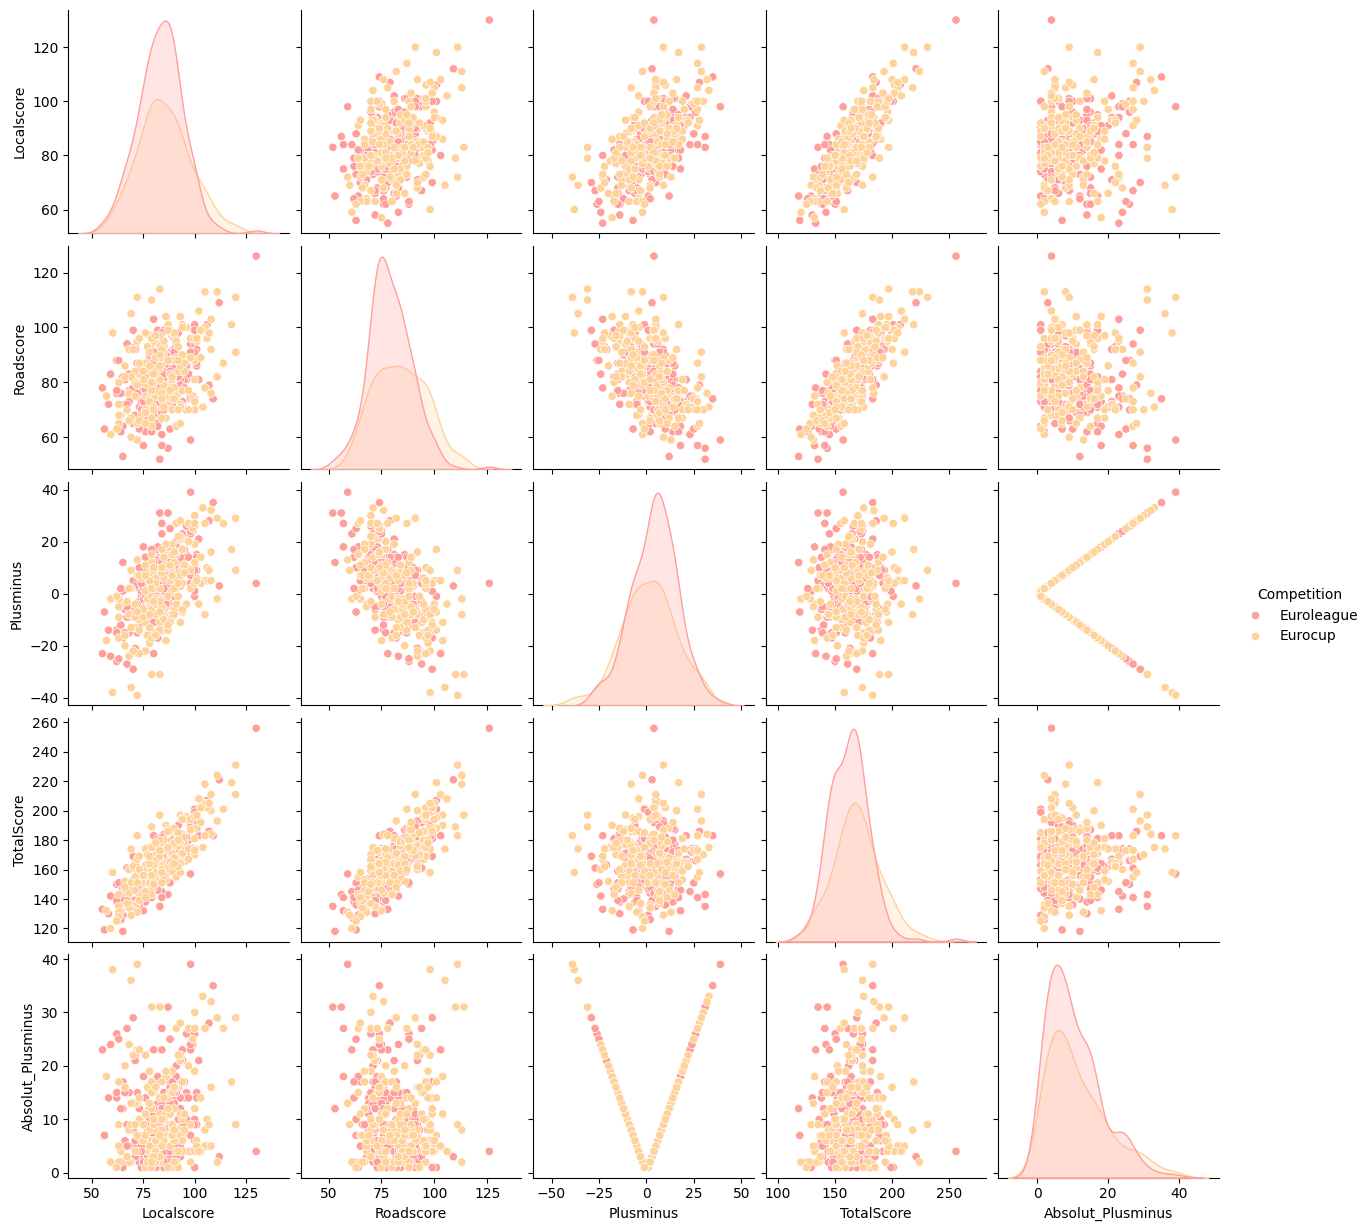

In [ ]:
# Correlation / Heatmap
sns.pairplot(competition, hue="Competition", palette=colors);

**Your comments here**
- Aqui buscamos la correlación entre las distintas variables del data frame. 
- Confirmamos que las variables más correlacionadas son Total Score con Local Score y Road Score

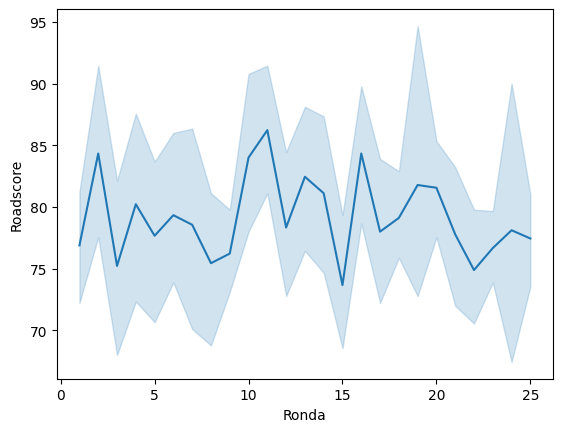

In [32]:
# Trends
elteams
sns.lineplot(x='Ronda',
             y = 'Roadscore',  
             data=elteams);

**Your comments here**
- Aqui podemos ver el trend de los puntos marcados por los equipos visitantentes durande las distintas rondas.
- Podemos observar cómo en la Ronda 10 el eequipo visitante marco mas puntos de la media